In [1]:
import pandas as pd

In [5]:
print(pd.__version__)

2.2.2


In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
auto = pd.read_csv("auto.txt", delim_whitespace=True, na_values="?")
auto.dropna(inplace=True)  # 결측치 제거

# 독립 변수와 종속 변수 설정
X = auto['horsepower']
y = auto['mpg']

# 상수 추가 (절편을 위한 상수 항 추가)
X = sm.add_constant(X)

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        19:50:26   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

/var/folders/5r/_lrk1tj977b6702w4csn2frh0000gn/T/ipykernel_27639/2829277101.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv("auto.txt", delim_whitespace=True, na_values="?")


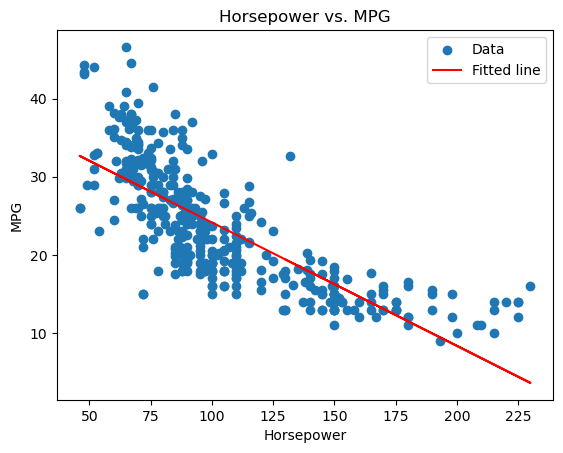

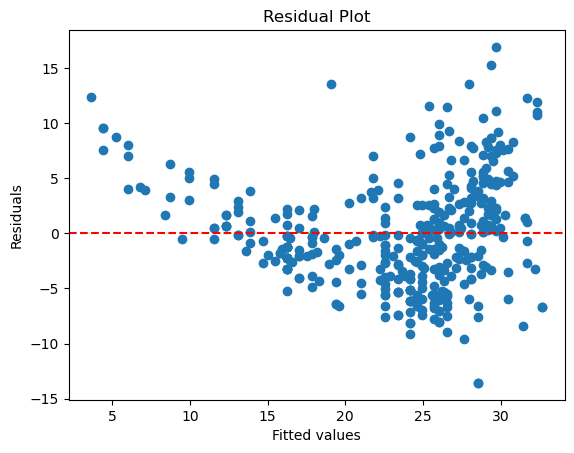

In [12]:
# 산점도 및 회귀선 그리기
plt.scatter(auto['horsepower'], auto['mpg'], label='Data')
plt.plot(auto['horsepower'], model.predict(X), color='red', label='Fitted line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs. MPG')
plt.legend()
plt.show()

# 잔차 플롯 그리기
residuals = model.resid
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [23]:
#Question 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 불러오기
auto = pd.read_csv("auto.txt", sep=r'\s+', na_values="?")
auto.dropna(inplace=True)  # 결측치 제거

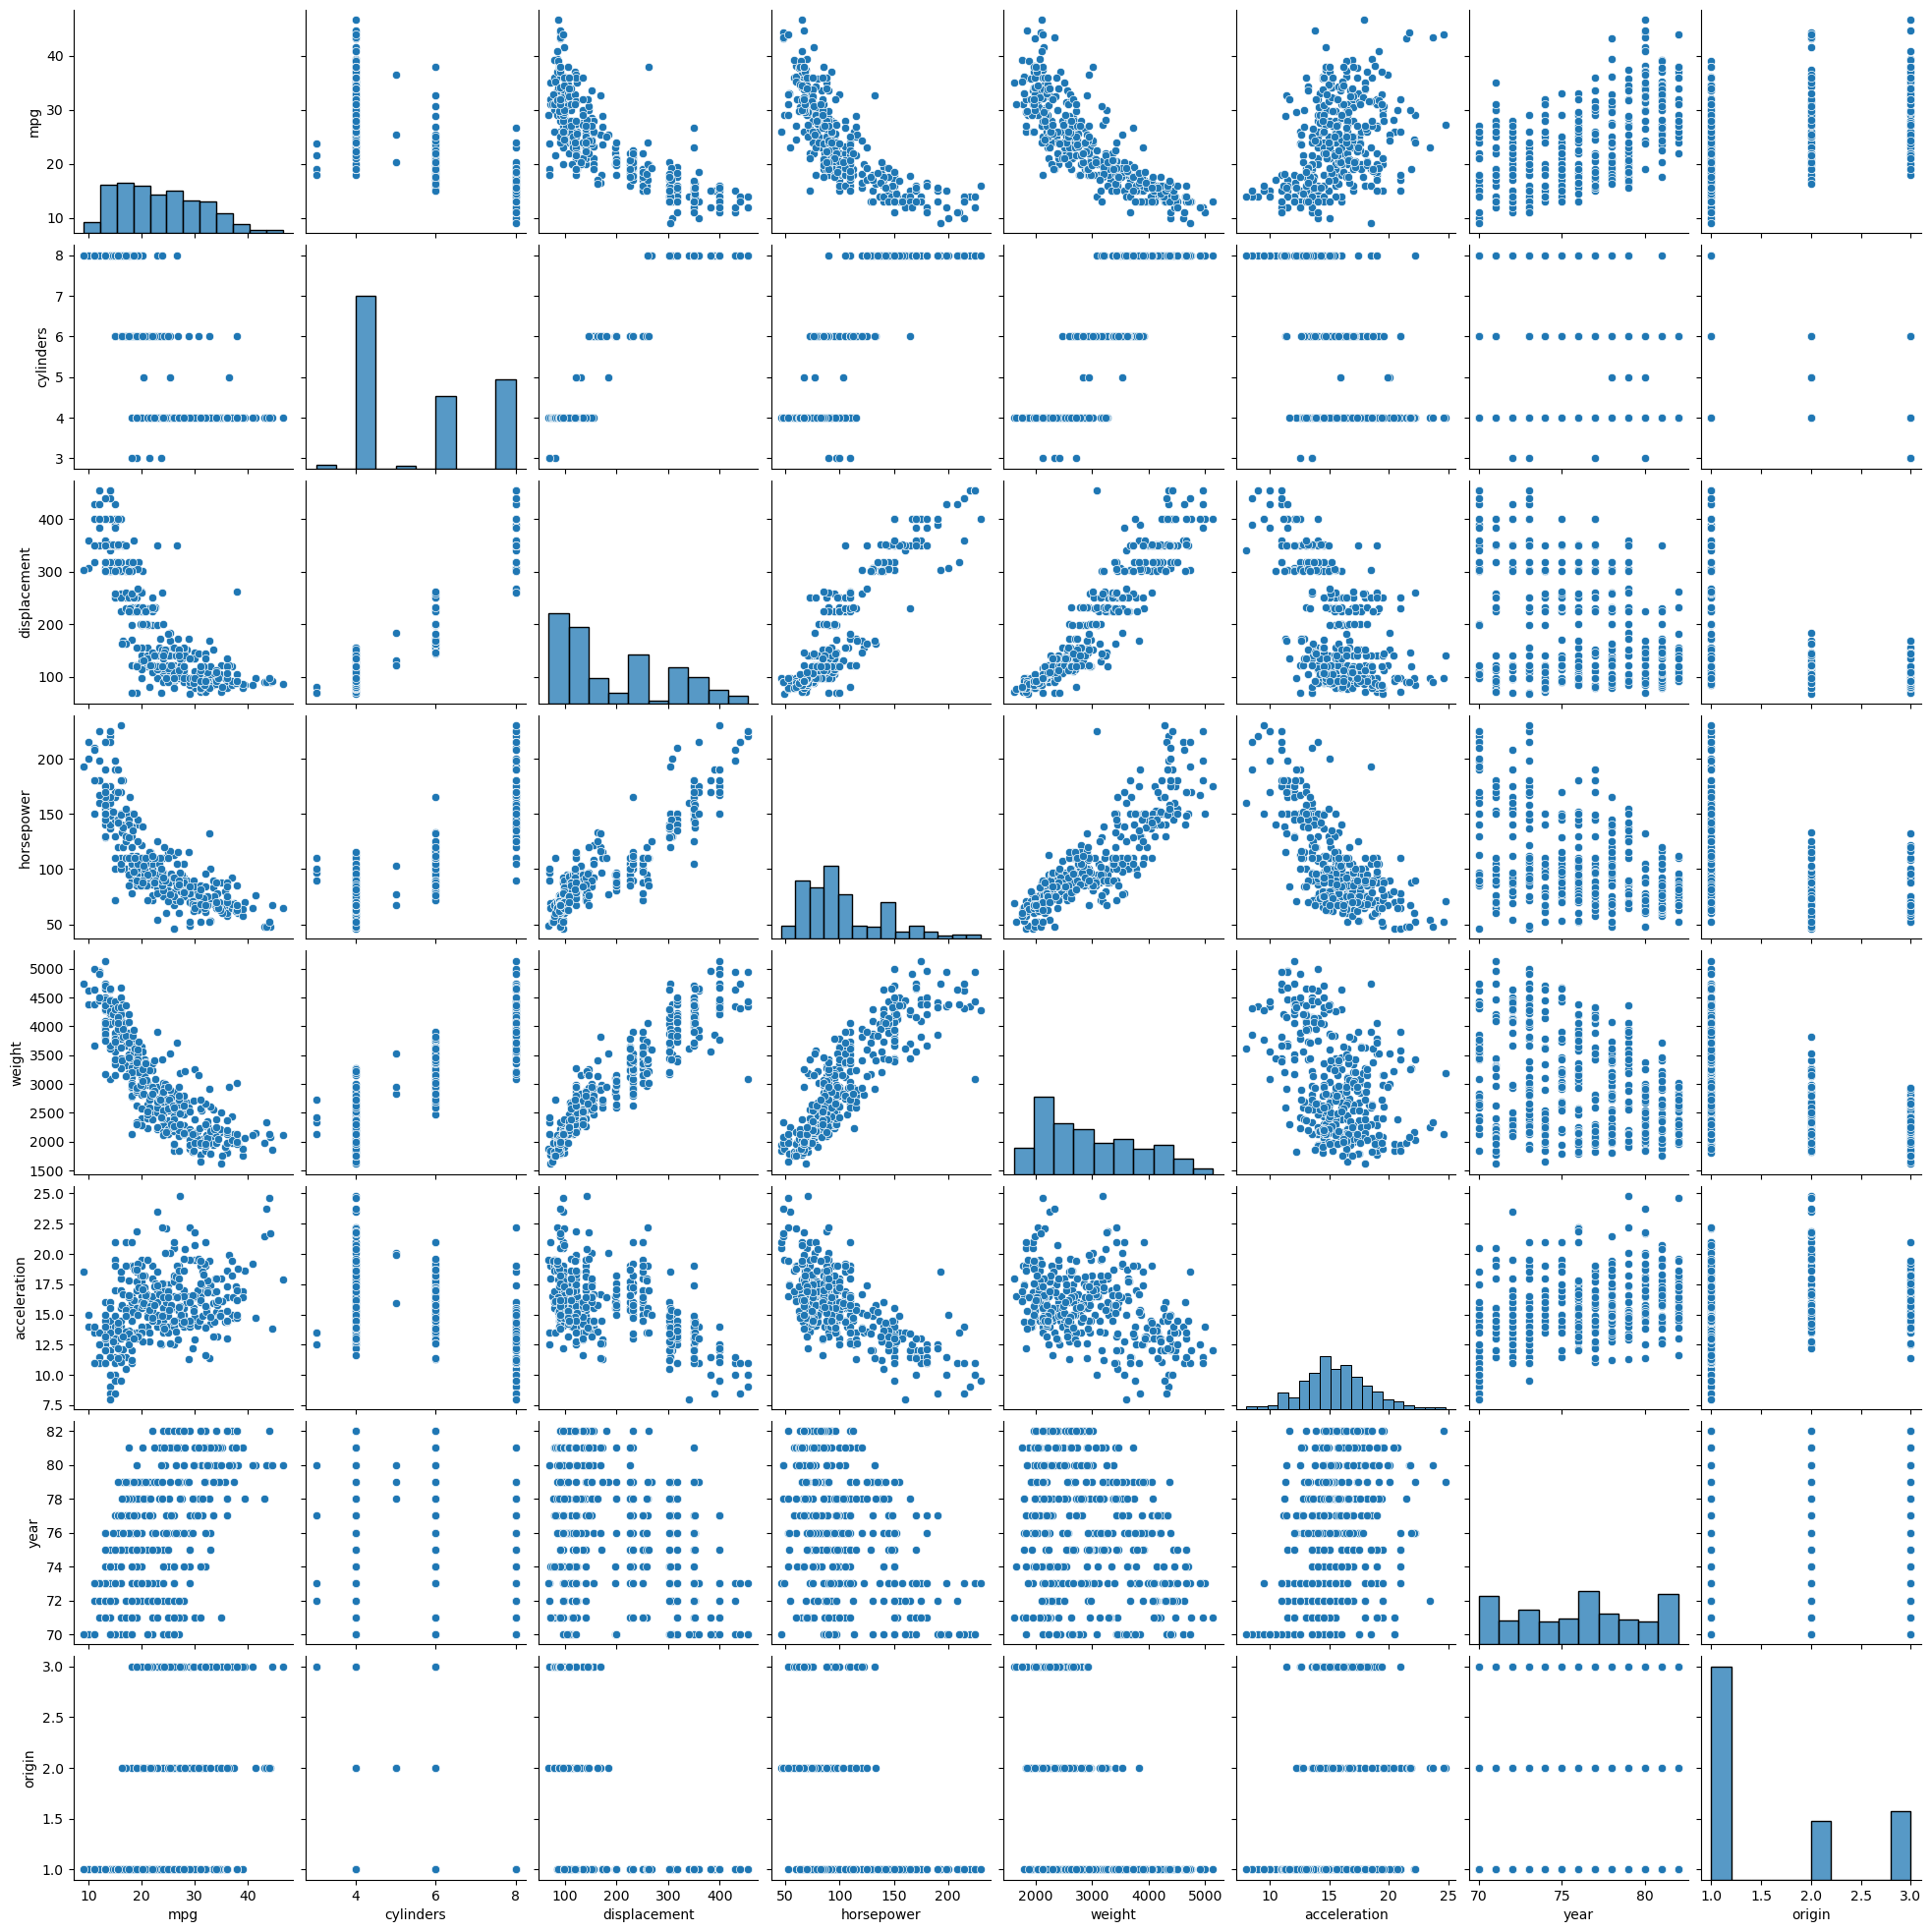

In [25]:
#(a) 산점도 행렬을 기반으로 mpg와 다른 예측 변수들 간의 관계 설명
sns.pairplot(auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']])
plt.show()

In [27]:
#(b) mpg와 displacement 간의 상관관계 계산
# 상관계수 계산
correlation_matrix = auto[['mpg', 'displacement']].corr()
print(correlation_matrix)

                   mpg  displacement
mpg           1.000000     -0.805127
displacement -0.805127      1.000000


In [29]:
#(c) 통계적으로 유의미한 관계 확인 (F-검정)
# 회귀 분석을 위한 데이터 준비
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']

# 상수 추가 (절편 추가)
X = sm.add_constant(X)

# 회귀 모델 생성
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        19:56:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [33]:
#(d) 다중 회귀에서 통계적으로 유의미한 예측 변수 확인
# p-값을 확인하여 유의미한 예측 변수를 찾음
print(model.pvalues)

const           2.401841e-04
cylinders       1.277965e-01
displacement    8.444649e-03
horsepower      2.196328e-01
weight          7.874953e-21
acceleration    4.154780e-01
year            3.055983e-39
origin          4.665681e-07
dtype: float64


In [35]:
#(e) 연도(year) 변수의 기울기 계수 해석
# 연도(year) 변수의 기울기 계수 확인
print(model.params['year'])

0.7507726779503132


In [39]:
#(f) displacement 변수의 기울기 계수 해석
# displacement 변수의 기울기 계수 확인
print(model.params['displacement'])

0.019895643742015533


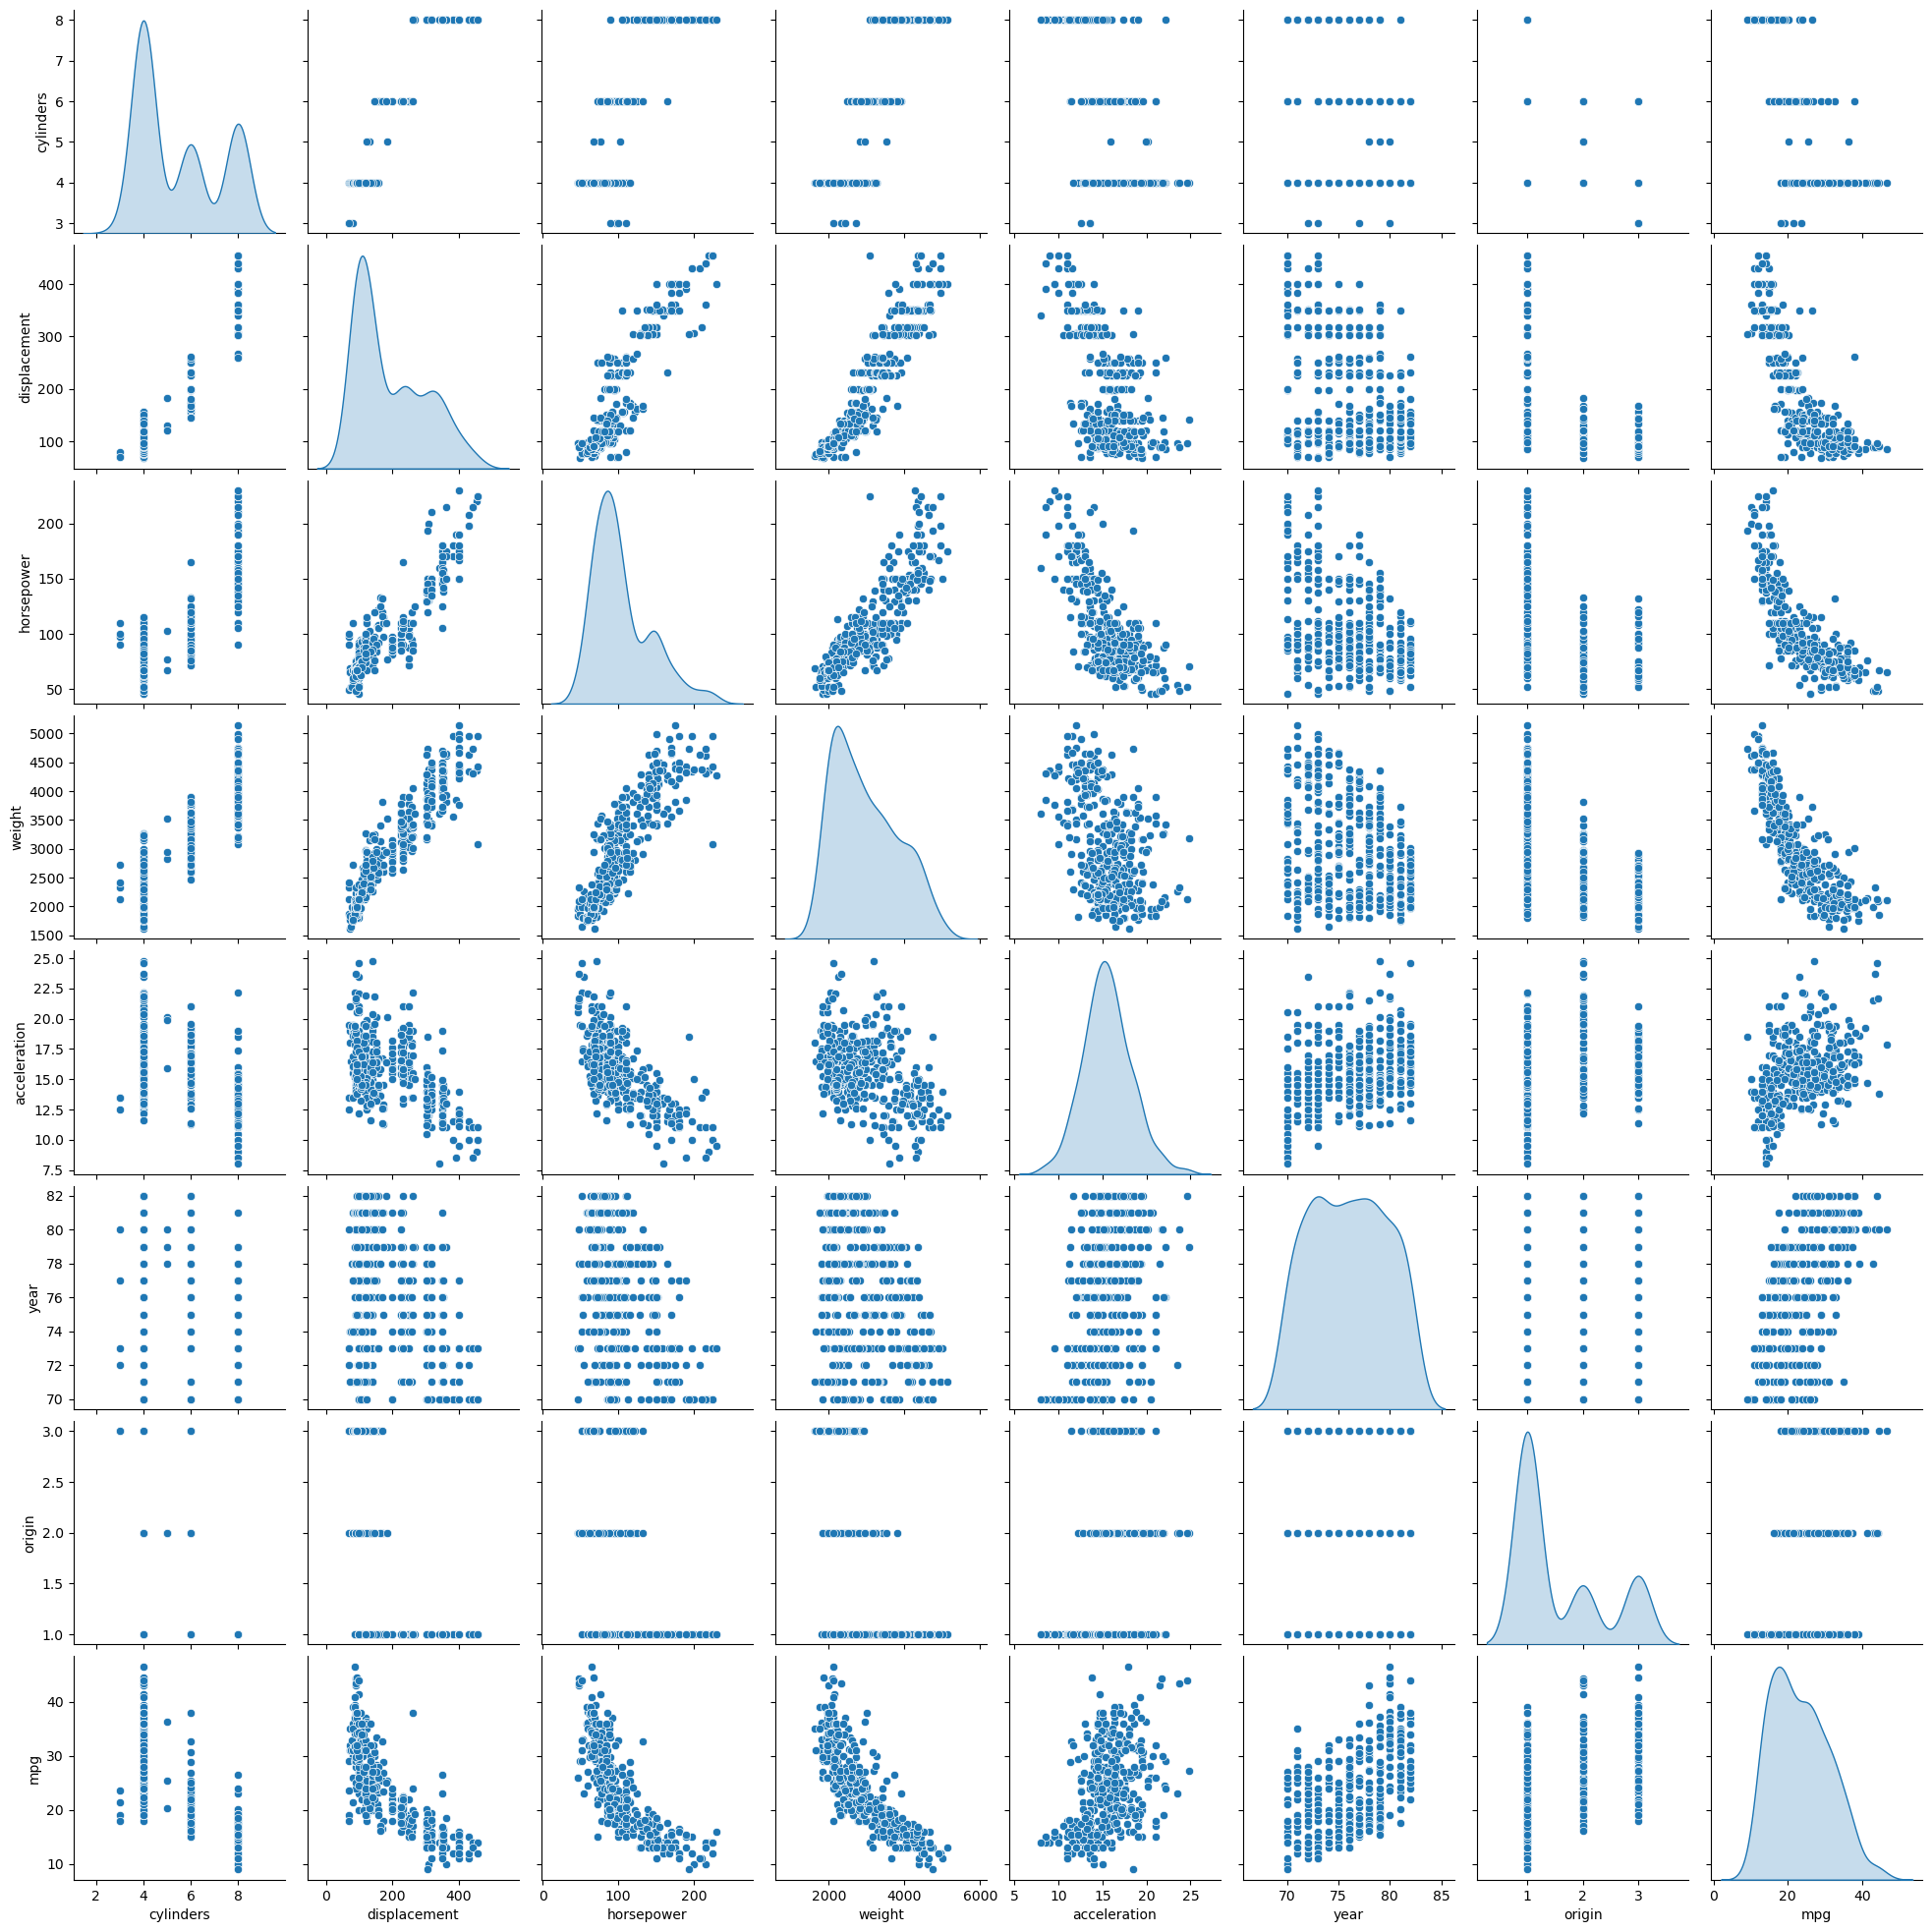

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("auto.txt", sep=r'\s+', na_values="?")
df = df.dropna()

# 필요한 열 선택 (R 코드에서 c(2:8,1)은 2~8번 열과 1번 열을 의미함)
selected_columns = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'mpg']]

# 상관 행렬 플롯
sns.pairplot(selected_columns, diag_kind='kde')  # kde는 히스토그램 대신 커널 밀도 추정
plt.show()

In [47]:
# 상관계수 행렬 계산
corr_matrix = selected_columns.corr()
print(corr_matrix)

              cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950823    0.842983  0.897527     -0.504683   
displacement   0.950823      1.000000    0.897257  0.932994     -0.543800   
horsepower     0.842983      0.897257    1.000000  0.864538     -0.689196   
weight         0.897527      0.932994    0.864538  1.000000     -0.416839   
acceleration  -0.504683     -0.543800   -0.689196 -0.416839      1.000000   
year          -0.345647     -0.369855   -0.416361 -0.309120      0.290316   
origin        -0.568932     -0.614535   -0.455171 -0.585005      0.212746   
mpg           -0.777618     -0.805127   -0.778427 -0.832244      0.423329   

                  year    origin       mpg  
cylinders    -0.345647 -0.568932 -0.777618  
displacement -0.369855 -0.614535 -0.805127  
horsepower   -0.416361 -0.455171 -0.778427  
weight       -0.309120 -0.585005 -0.832244  
acceleration  0.290316  0.212746  0.423329  
year          1.000000  0.181528  0.

In [49]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("auto.txt", sep=r'\s+', na_values="?")
df = df.dropna()

# 1번부터 7번 열 선택 (R 코드에서 dt1[, 1:7])
selected_columns = df.iloc[:, 0:7]

# 상관계수 계산 및 소수점 4자리까지 반올림
corr_matrix = selected_columns.corr().round(4)

# 상관계수 출력
print(corr_matrix)

                 mpg  cylinders  displacement  horsepower  weight  \
mpg           1.0000    -0.7776       -0.8051     -0.7784 -0.8322   
cylinders    -0.7776     1.0000        0.9508      0.8430  0.8975   
displacement -0.8051     0.9508        1.0000      0.8973  0.9330   
horsepower   -0.7784     0.8430        0.8973      1.0000  0.8645   
weight       -0.8322     0.8975        0.9330      0.8645  1.0000   
acceleration  0.4233    -0.5047       -0.5438     -0.6892 -0.4168   
year          0.5805    -0.3456       -0.3699     -0.4164 -0.3091   

              acceleration    year  
mpg                 0.4233  0.5805  
cylinders          -0.5047 -0.3456  
displacement       -0.5438 -0.3699  
horsepower         -0.6892 -0.4164  
weight             -0.4168 -0.3091  
acceleration        1.0000  0.2903  
year                0.2903  1.0000  


In [51]:
import pandas as pd
import statsmodels.api as sm

# 데이터 불러오기
df = pd.read_csv("auto.txt", sep=r'\s+', na_values="?")
df = df.dropna()

# 독립 변수와 종속 변수 설정 (1번부터 8번 열 선택)
X = df.iloc[:, 1:8]  # 독립 변수 (mpg를 제외한 나머지 열)
y = df['mpg']  # 종속 변수 (mpg)

# 상수 추가 (절편 포함)ㄴ
X = sm.add_constant(X)

# 다중 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 29 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        21:04:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   